<a href="https://colab.research.google.com/github/heimmer/profile/blob/main/Loan_default_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows=30
pd.options.display.max_columns=None

%matplotlib inline
#Used directly in the Ipython compiler, the functionality allows inline plotting and the plt.show() step can be omitted.

# import dataset

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir("/content/gdrive/MyDrive/Colab Notebooks")

Mounted at /content/gdrive


In [29]:
train_public = pd.read_csv('./loan default detection/train_public.csv')
# train_internet = pd.read_csv('./loan default detection/train_internet.csv')
test_public = pd.read_csv('./loan default detection/test_public.csv')


#

# Exploratory Data Analysis (EDA)

## method1: using sweetviz
[Sweetviz](https://pypi.org/project/sweetviz/) is an open-source Python library that generates beautiful, high-density visualizations to kickstart EDA (Exploratory Data Analysis) with just two lines of code. Output is a fully self-contained HTML application.

For **COLAB USERS**: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.

In [ ]:
# !pip install sweetviz

In [ ]:
import sweetviz as sv
my_report = sv.analyze(train_public, target_feat = 'isDefault')
my_report.show_html()

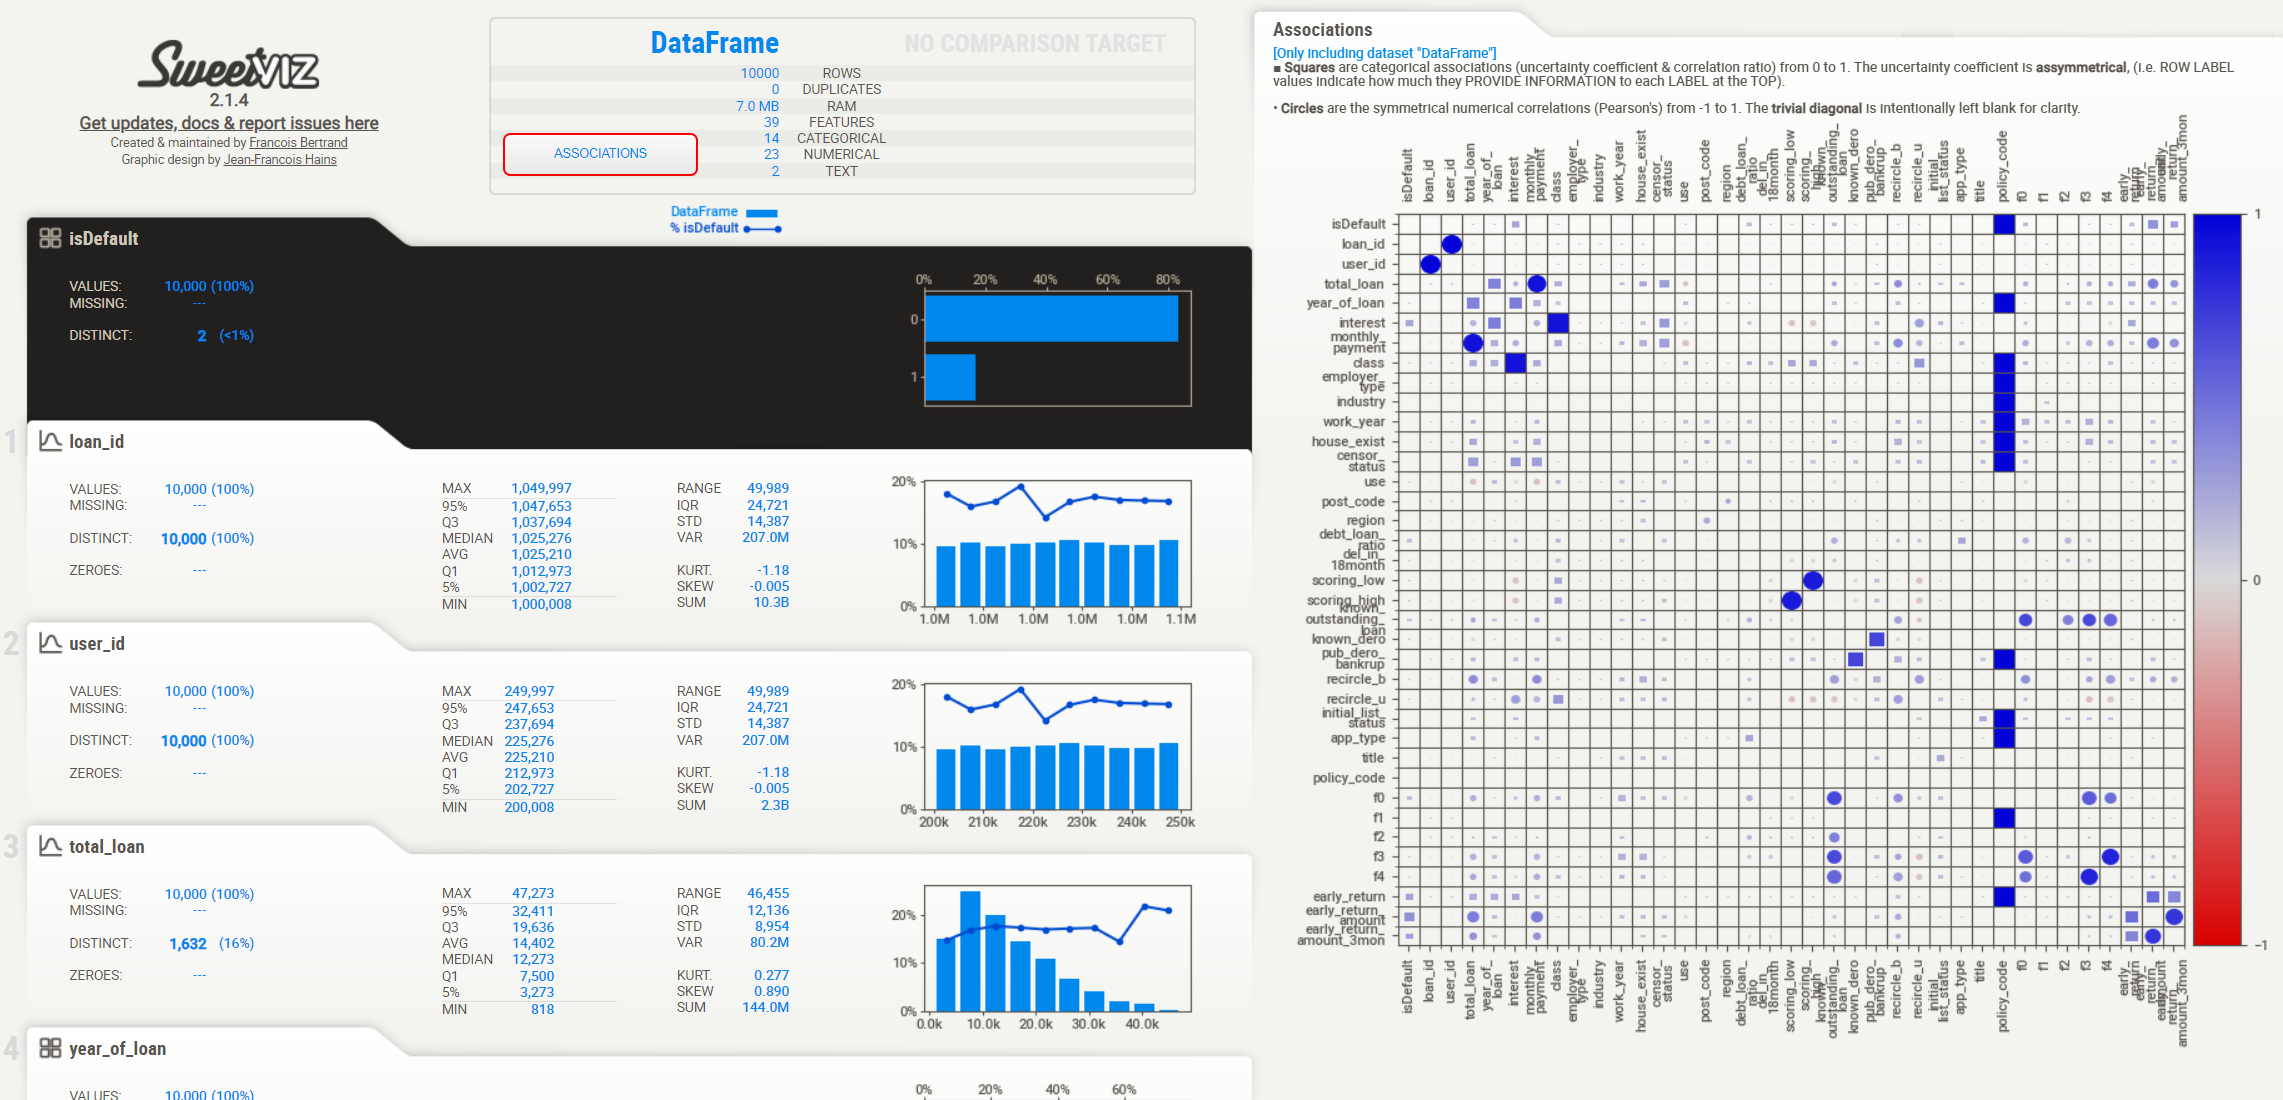

In [ ]:
## datasets comparision
# feature_config = sv.FeatureConfig(force_cat=["f1"])
# my_report2 = sv.compare([train_public, "Public Data"], [train_internet, "Internet Data"], "isDefault", feature_config)
# my_report2.show_html()


## method2: Pandas_Profiling
Time needed for calculation is longer than sweetviz, the saved html file is also much larger.  

For **COLAB USERS**: the web browser MAY not pop up, you need to use profile.to_file() to save it in Google Drive.  
[Github](https://github.com/ydataai/ydata-profiling)

In [ ]:
!pip install ydata-profiling

In [10]:
from ydata_profiling import ProfileReport
profile = ProfileReport(train_public, title='train_public Pandas Profiling Report', explorative = True)
profile.to_file("your_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## method3: conventional ways

### **overview**

In [17]:
train_public.shape, test_public.shape

((10000, 39), (5000, 38))

In [31]:
train_public.head()

,loan_id,user_id,total_loan,year_of_loan,interest,monthly_payment,class,employer_type,industry,work_year,house_exist,censor_status,issue_date,use,post_code,region,debt_loan_ratio,del_in_18month,scoring_low,scoring_high,known_outstanding_loan,known_dero,pub_dero_bankrup,recircle_b,recircle_u,initial_list_status,app_type,earlies_credit_mon,title,policy_code,f0,f1,f2,f3,f4,early_return,early_return_amount,early_return_amount_3mon,isDefault
0,1040418,240418,31818.18182,3,11.466,1174.91,C,政府机构,金融业,3 years,0,1,2016/10/1,2,193,13,2.430000,0,556.363636,649.090909,3,0,0.0,7734.230769,91.800000,0,0,1-Dec,5,1,1.0,0.0,4.0,5.0,4.0,3,9927,0.0,0
1,1025197,225197,28000.00000,5,16.841,670.69,C,政府机构,金融业,10+ years,0,2,2013/6/1,0,491,30,11.004545,1,715.000000,893.750000,3,0,0.0,31329.000000,54.800000,1,0,Apr-90,40642,1,7.0,0.0,4.0,45.0,22.0,0,0,0.0,0
2,1009360,209360,17272.72727,3,8.900,603.32,A,政府机构,公共服务、社会组织,10+ years,1,0,2014/1/1,4,459,8,6.409091,0,774.545455,903.636364,5,0,0.0,18514.000000,57.692308,1,0,Oct-91,154,1,6.0,0.0,6.0,28.0,19.0,0,0,0.0,0
3,1039708,239708,20000.00000,3,4.788,602.30,A,世界五百强,文化和体育业,6 years,0,1,2015/7/1,0,157,8,9.204545,0,750.000000,875.000000,3,0,0.0,20707.000000,42.600000,0,0,1-Jun,0,1,5.0,0.0,10.0,15.0,9.0,0,0,0.0,0
4,1027483,227483,15272.72727,3,12.790,470.31,C,政府机构,信息传输、软件和信息技术服务业,< 1 year,2,1,2016/7/1,0,38,21,15.578182,0,609.090909,710.606061,15,0,0.0,14016.153850,30.461538,0,0,2-May,0,1,10.0,0.0,6.0,15.0,4.0,0,0,0.0,0


In [34]:
test_public.head()

,loan_id,user_id,total_loan,year_of_loan,interest,monthly_payment,class,employer_type,industry,work_year,house_exist,censor_status,issue_date,use,post_code,region,debt_loan_ratio,del_in_18month,scoring_low,scoring_high,known_outstanding_loan,known_dero,pub_dero_bankrup,recircle_b,recircle_u,initial_list_status,app_type,earlies_credit_mon,title,policy_code,f0,f1,f2,f3,f4,early_return,early_return_amount,early_return_amount_3mon
0,1000575,200575,2890.909091,3,10.791,88.01,B,幼教与中小学校,住宿和餐饮业,5 years,0,1,2017/12/1,0,314,0,23.040000,0,745.000000,869.166667,7,0,0.0,8647.692308,31.846154,1,0,3-Mar,0,1,2.0,0.0,15.0,5.0,4.0,3,773,89.192308
1,1028125,228125,7272.727273,3,9.990,258.10,B,普通企业,批发和零售业,10+ years,1,1,2015/7/1,5,29,19,27.754545,0,681.818182,738.636364,24,0,0.0,9406.153846,18.276923,0,0,Dec-99,6,1,8.0,0.0,8.0,29.0,14.0,1,1894,218.538462
2,1010694,210694,26295.454550,3,15.763,764.03,C,普通企业,住宿和餐饮业,10+ years,0,2,2013/4/1,0,488,24,25.494545,1,758.181818,947.727273,11,0,0.0,26414.769230,62.300000,1,0,Apr-99,268,1,6.0,0.0,4.0,10.0,6.0,1,5670,1221.230769
3,1026712,226712,22690.909090,5,19.305,524.30,D,普通企业,采矿业,10+ years,0,2,2017/12/1,0,489,30,10.620000,0,572.727273,620.454545,8,0,0.0,1198.000000,7.700000,0,0,Jul-00,0,1,4.0,0.0,12.0,10.0,8.0,2,4800,443.076923
4,1002895,202895,14545.454550,3,7.139,490.32,A,世界五百强,金融业,1 year,0,0,2016/6/1,2,418,45,6.610909,0,638.181818,691.363636,15,0,0.0,3920.000000,8.830769,1,0,7-May,5,1,4.0,0.0,7.0,14.0,9.0,0,3516,649.107692


In [32]:
train_public.describe()

,loan_id,user_id,total_loan,year_of_loan,interest,monthly_payment,house_exist,censor_status,use,post_code,region,debt_loan_ratio,del_in_18month,scoring_low,scoring_high,known_outstanding_loan,known_dero,pub_dero_bankrup,recircle_b,recircle_u,initial_list_status,app_type,title,policy_code,f0,f1,f2,f3,f4,early_return,early_return_amount,early_return_amount_3mon,isDefault
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9993.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.0,9502.000000,9142.000000,9502.000000,9502.000000,9502.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.025210e+06,225209.587700,14402.126591,3.479600,13.222782,436.960427,0.612200,1.014600,1.762600,257.519100,16.319900,17.532170,0.311600,664.115591,774.448326,11.645000,0.226400,0.138997,16548.299423,53.622625,0.414100,0.020000,1808.20160,1.0,5.690486,0.001422,8.467796,14.659019,8.098085,1.290600,2173.916100,335.232240,0.168300
std,1.438682e+04,14386.820956,8953.946807,0.853965,4.875755,261.754396,0.672203,0.787686,2.392031,201.351778,11.019097,14.218509,0.872457,77.040511,99.174427,5.500745,0.607931,0.379089,21078.544232,26.023562,0.492591,0.140007,8011.09827,0.0,3.298546,0.037685,7.315953,8.263954,4.871797,1.449469,3027.539977,635.108825,0.374151
min,1.000008e+06,200008.000000,818.181818,3.000000,4.779000,30.440000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,540.000000,585.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.012973e+06,212973.250000,7500.000000,3.000000,9.702000,248.820000,0.000000,0.000000,0.000000,99.000000,8.000000,11.157955,0.000000,601.363636,700.000000,8.000000,0.000000,0.000000,6189.173077,33.969231,0.000000,0.000000,0.00000,1.0,3.000000,0.000000,4.000000,9.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,1.025276e+06,225276.500000,12272.727270,3.000000,12.639000,371.525000,1.000000,1.000000,0.000000,197.000000,14.000000,16.652273,0.000000,665.000000,772.727273,11.000000,0.000000,0.000000,11476.076925,53.280769,0.000000,0.000000,1.00000,1.0,5.000000,0.000000,7.000000,13.000000,7.000000,1.000000,838.500000,0.000000,0.000000
75%,1.037694e+06,237694.500000,19636.363640,3.000000,15.985500,573.830000,1.000000,2.000000,4.000000,390.000000,22.000000,22.781591,0.000000,725.454545,845.000000,14.000000,0.000000,0.000000,20384.076923,73.309615,1.000000,0.000000,5.00000,1.0,7.000000,0.000000,11.000000,19.000000,11.000000,3.000000,3354.250000,413.675000,0.000000
max,1.049997e+06,249997.000000,47272.727270,5.000000,33.979000,1503.890000,4.000000,2.000000,13.000000,901.000000,49.000000,999.000000,15.000000,910.909091,1131.818182,59.000000,12.000000,5.000000,779021.000000,120.615385,1.000000,1.000000,61387.00000,1.0,33.000000,1.000000,93.000000,88.000000,50.000000,5.000000,18413.000000,5523.900000,1.000000


**feature type**

In [19]:
train_public.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_id                   10000 non-null  int64  
 1   user_id                   10000 non-null  int64  
 2   total_loan                10000 non-null  float64
 3   year_of_loan              10000 non-null  int64  
 4   interest                  10000 non-null  float64
 5   monthly_payment           10000 non-null  float64
 6   class                     10000 non-null  object 
 7   employer_type             10000 non-null  object 
 8   industry                  10000 non-null  object 
 9   work_year                 9378 non-null   object 
 10  house_exist               10000 non-null  int64  
 11  censor_status             10000 non-null  int64  
 12  issue_date                10000 non-null  object 
 13  use                       10000 non-null  int64  
 14  post_co

**missing value**

In [18]:
train_public.isnull().sum()

loan_id                       0
user_id                       0
total_loan                    0
year_of_loan                  0
interest                      0
monthly_payment               0
class                         0
employer_type                 0
industry                      0
work_year                   622
house_exist                   0
censor_status                 0
issue_date                    0
use                           0
post_code                     0
region                        0
debt_loan_ratio               0
del_in_18month                0
scoring_low                   0
scoring_high                  0
known_outstanding_loan        0
known_dero                    0
pub_dero_bankrup              7
recircle_b                    0
recircle_u                    0
initial_list_status           0
app_type                      0
earlies_credit_mon            0
title                         0
policy_code                   0
f0                          498
f1      

In [23]:
# Display missing values
def missing_value_table(df):

    mis_val = df.isnull().sum()

    mis_val_percent = 100 * df.isnull().sum() / len(df)

    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_rename = mis_val_table.rename(columns = {0:'Missing values', 1:'% of total values'})

    mis_val_rename = mis_val_rename[mis_val_rename.iloc[:,1] != 0].sort_values('% of total values',ascending = False)
    return mis_val_rename
missing_value_table(train_public)[:20]

,Missing values,% of total values
f1,858,8.58
work_year,622,6.22
f0,498,4.98
f2,498,4.98
f3,498,4.98
f4,498,4.98
pub_dero_bankrup,7,0.07


In [20]:
train_public.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

class                   7
employer_type           6
industry               14
work_year              11
issue_date            127
earlies_credit_mon    528
dtype: int64

**duplication check**

In [21]:
train_public.duplicated().sum()

0

### distribution

In [39]:
cat_features = list(train_public.select_dtypes(include=['object']).columns)
con_features = list(train_public.select_dtypes(include=['float64','int64']).columns)

#### numerical features

array([[<Axes: title={'center': 'loan_id'}>,
        <Axes: title={'center': 'user_id'}>,
        <Axes: title={'center': 'total_loan'}>,
        <Axes: title={'center': 'year_of_loan'}>,
        <Axes: title={'center': 'interest'}>,
        <Axes: title={'center': 'monthly_payment'}>],
       [<Axes: title={'center': 'house_exist'}>,
        <Axes: title={'center': 'censor_status'}>,
        <Axes: title={'center': 'use'}>,
        <Axes: title={'center': 'post_code'}>,
        <Axes: title={'center': 'region'}>,
        <Axes: title={'center': 'debt_loan_ratio'}>],
       [<Axes: title={'center': 'del_in_18month'}>,
        <Axes: title={'center': 'scoring_low'}>,
        <Axes: title={'center': 'scoring_high'}>,
        <Axes: title={'center': 'known_outstanding_loan'}>,
        <Axes: title={'center': 'known_dero'}>,
        <Axes: title={'center': 'pub_dero_bankrup'}>],
       [<Axes: title={'center': 'recircle_b'}>,
        <Axes: title={'center': 'recircle_u'}>,
        <Axes: t

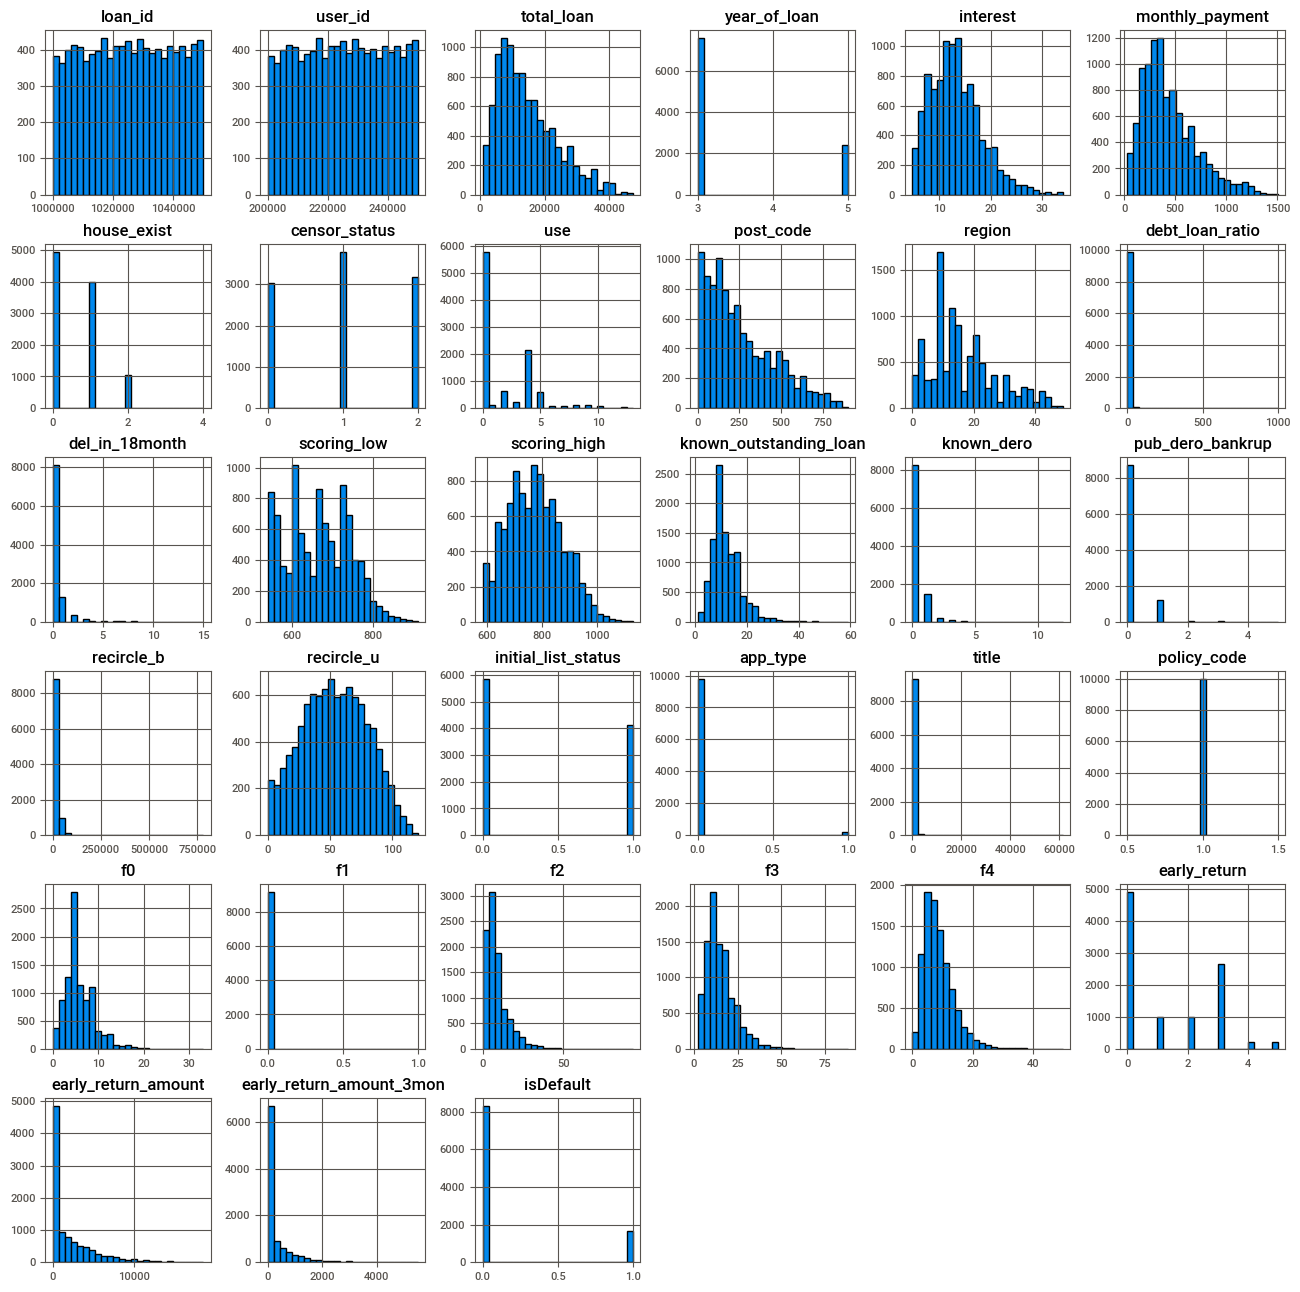

In [40]:
train_public[con_features].hist(figsize = (16,16), edgecolor = 'k', bins = 25)

#### categorical features

### corelation

<ipython-input-37-d389dc80da84>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_mat = train_public.corr()


<Axes: >

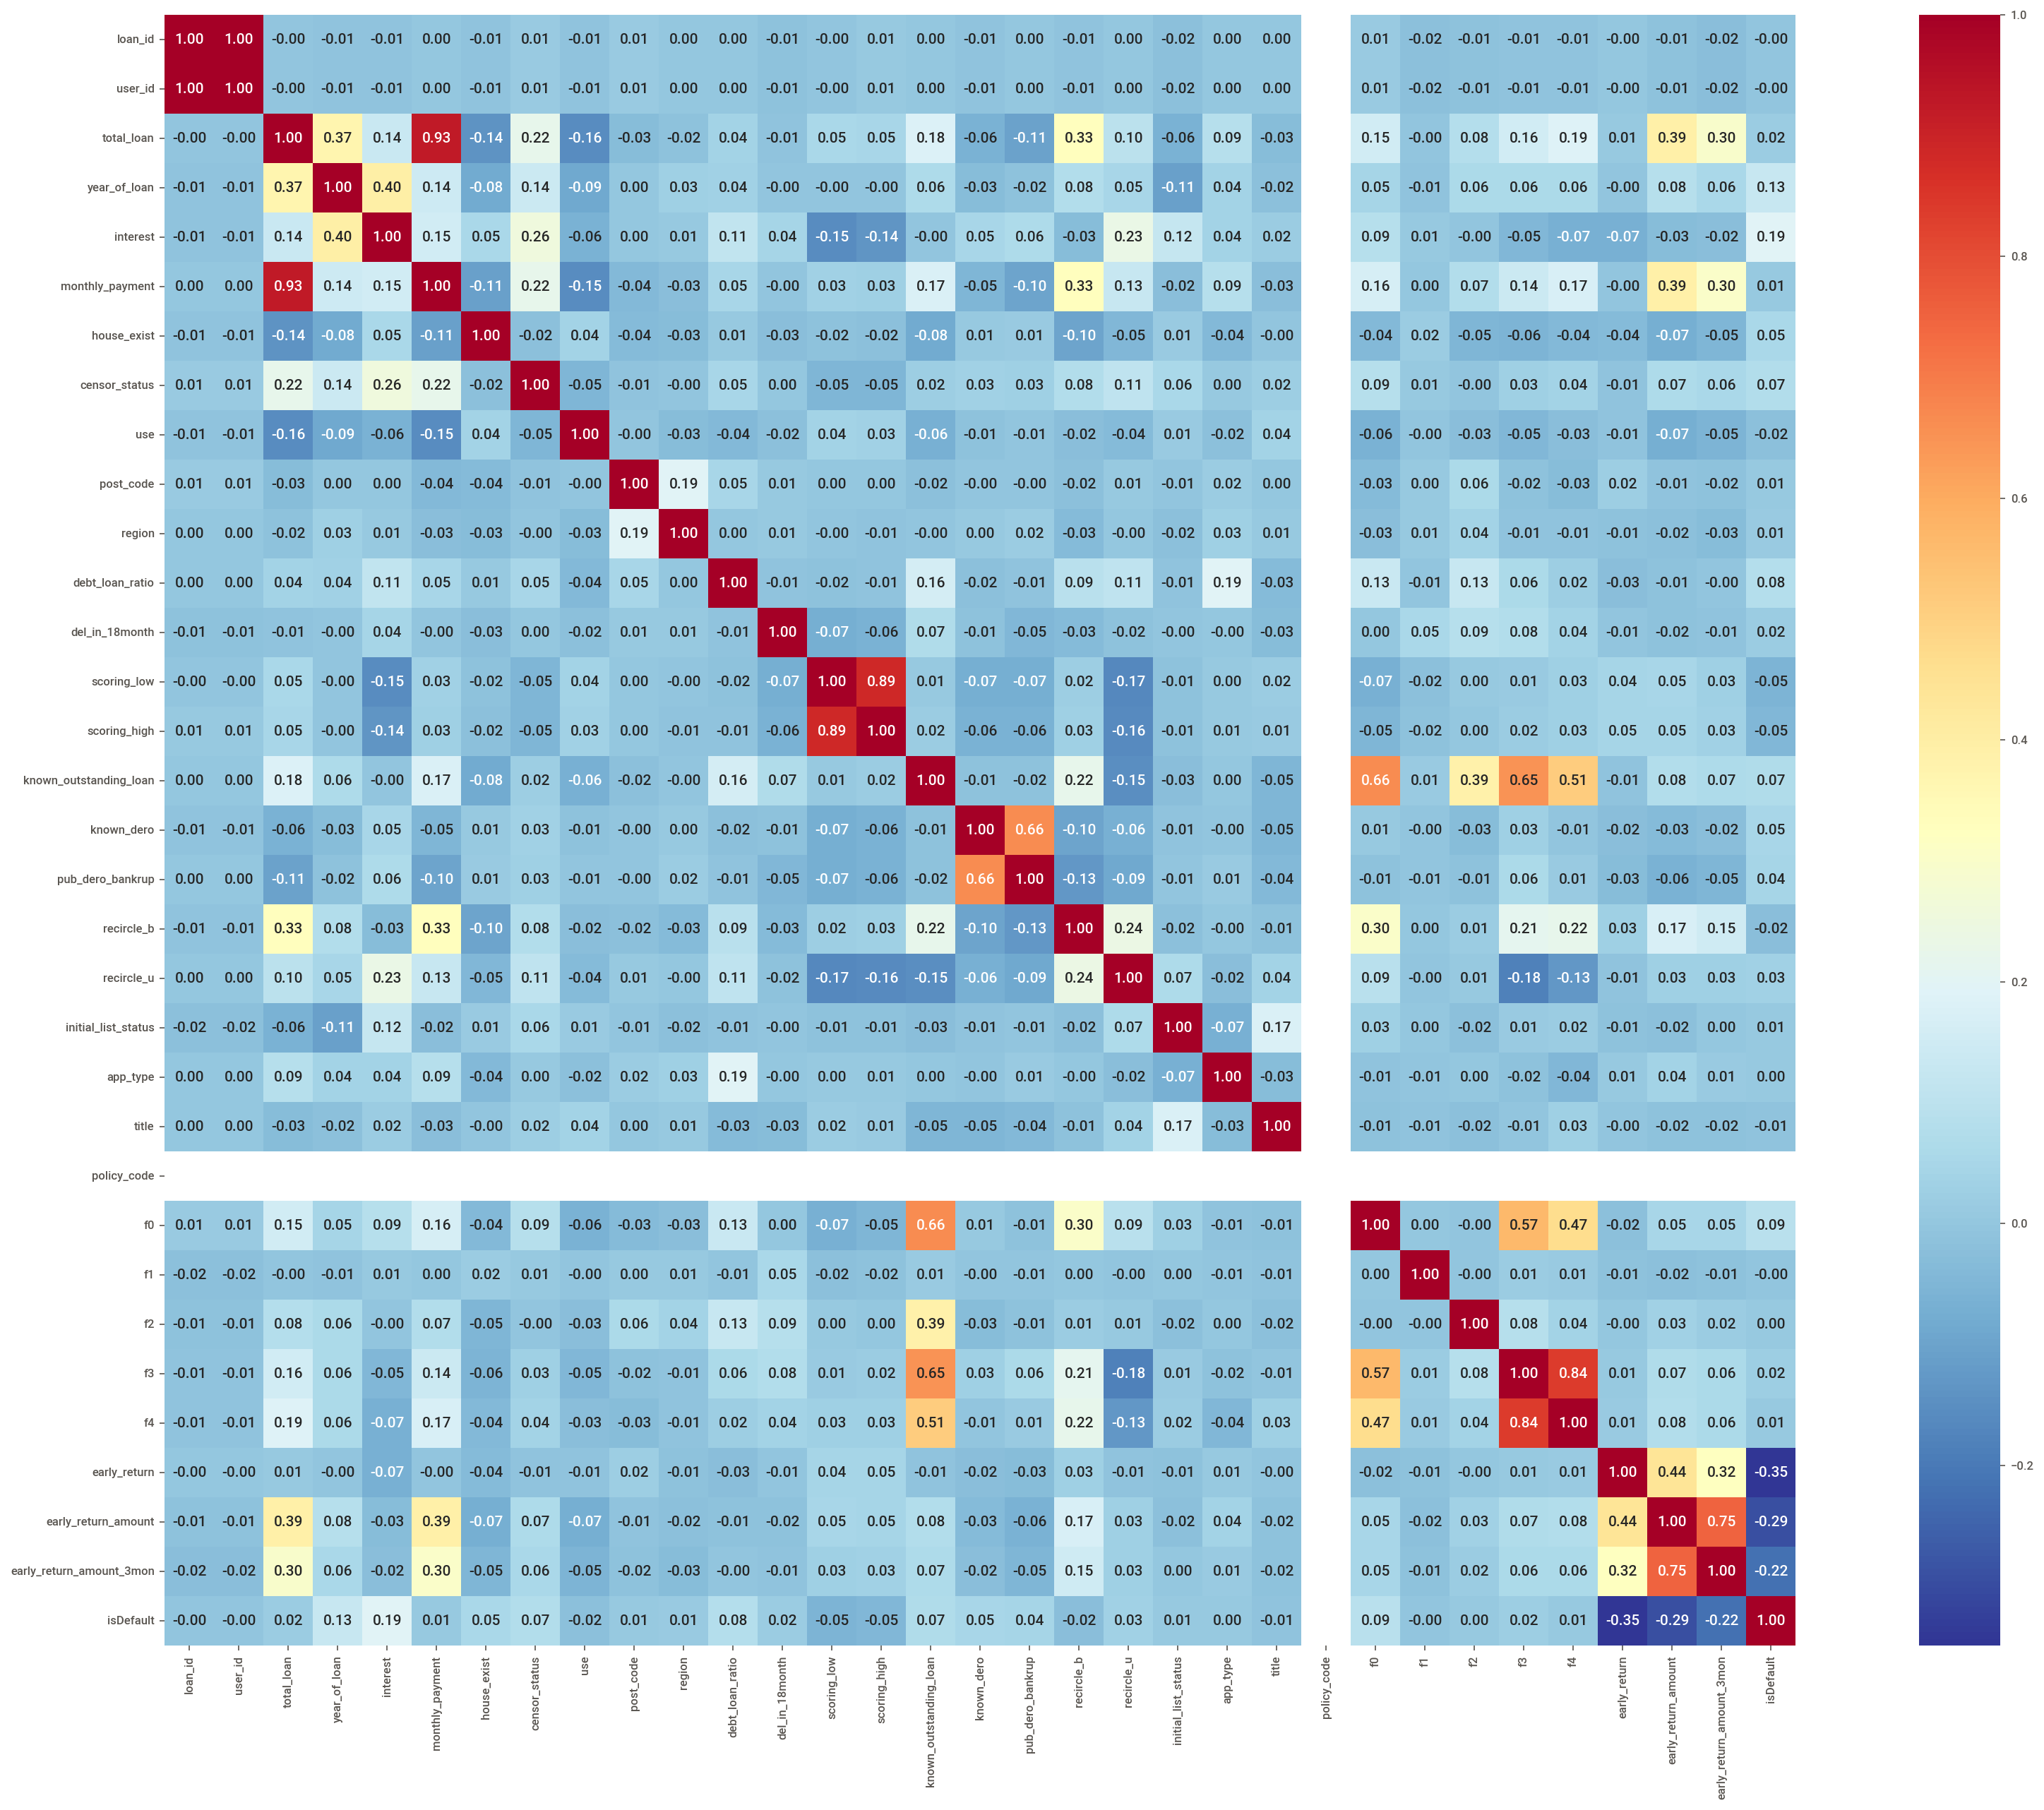

In [37]:
plt.subplots(figsize = (30,20), dpi = 150)
correlation_mat = train_public.corr()
sns.heatmap(correlation_mat,cmap = plt.cm.RdYlBu_r, annot = True, square = True, fmt = '.2f')

In [38]:
print(train_public.corr()['isDefault'].sort_values().head(10))
print(train_public.corr()['isDefault'].sort_values().tail(10))

<ipython-input-38-b43fb2b01aac>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(train_public.corr()['isDefault'].sort_values().head(10))
<ipython-input-38-b43fb2b01aac>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(train_public.corr()['isDefault'].sort_values().tail(10))


early_return               -0.348921
early_return_amount        -0.292496
early_return_amount_3mon   -0.217593
scoring_low                -0.054330
scoring_high               -0.047918
recircle_b                 -0.022282
use                        -0.021953
title                      -0.006760
loan_id                    -0.001965
user_id                    -0.001965
Name: isDefault, dtype: float64
known_dero                0.050990
house_exist               0.053550
known_outstanding_loan    0.068733
censor_status             0.072765
debt_loan_ratio           0.080832
f0                        0.089131
year_of_loan              0.127342
interest                  0.194400
isDefault                 1.000000
policy_code                    NaN
Name: isDefault, dtype: float64


# Feature engineering

In [41]:
cat_features

['class',
 'employer_type',
 'industry',
 'work_year',
 'issue_date',
 'earlies_credit_mon']

## ordinal encoding

### work_year

In [44]:
train_public['work_year'].value_counts(dropna = False)

10+ years    3370
2 years       848
3 years       776
< 1 year      765
1 year        671
5 years       623
NaN           622
4 years       562
6 years       476
8 years       458
7 years       436
9 years       393
Name: work_year, dtype: int64

In [46]:
work_year_dict = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10,
}
train_public['work_year'] = train_public['work_year'].map(work_year_dict)
test_public['work_year'] = test_public['work_year'].map(work_year_dict)

train_public['work_year'] = train_public['work_year'].fillna(-1)
test_public['work_year'] = test_public['work_year'].fillna(-1)

In [47]:
train_public['work_year'].value_counts(dropna = False)

 10.0    3370
 2.0      848
 3.0      776
 0.0      765
 1.0      671
 5.0      623
-1.0      622
 4.0      562
 6.0      476
 8.0      458
 7.0      436
 9.0      393
Name: work_year, dtype: int64

### class

In [49]:
train_public['class'].value_counts(dropna = False)

B    2965
C    2859
A    1698
D    1483
E     693
F     241
G      61
Name: class, dtype: int64

In [52]:
class_dict = {
    'A':1,
    'B':2,
    'C':3,
    'D':4,
    'E':5,
    'F':6,
    'G':7
}

train_public['class'] = train_public['class'].map(class_dict)
test_public['class'] = test_public['class'].map(class_dict)

In [53]:
train_public['class'].value_counts(dropna = False)

2    2965
3    2859
1    1698
4    1483
5     693
6     241
7      61
Name: class, dtype: int64

## label encoding & one-hot endocing

In [54]:
train_public['employer_type'].value_counts(dropna = False)

普通企业       4610
政府机构       2474
幼教与中小学校    1053
上市企业        958
世界五百强       542
高等教育机构      363
Name: employer_type, dtype: int64

In [55]:
train_public['industry'].value_counts(dropna = False)

金融业                1629
电力、热力生产供应业         1248
公共服务、社会组织          1065
住宿和餐饮业              907
信息传输、软件和信息技术服务业     808
文化和体育业              793
建筑业                 704
房地产业                554
采矿业                 506
交通运输、仓储和邮政业         492
农、林、牧、渔业            466
制造业                 302
批发和零售业              279
国际组织                247
Name: industry, dtype: int64

Amount of classes is not large, so we can use **one-hot encoding**.  
But before that, we'd better do label encoding first to get rid of Chinese characters in feature names.  
[Here](https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/) is a guidence of when to use one-hot and when to use label encoding.

In [64]:
cat_cols = ['employer_type', 'industry']
from sklearn.preprocessing import LabelEncoder
for col in cat_cols:
  lb = LabelEncoder().fit(train_public[col])
  train_public[col] = lb.transform(train_public[col])
  test_public[col] = lb.transform(test_public[col])

In [65]:
train_public_dummy = pd.get_dummies(train_public, columns =['employer_type', 'industry'],drop_first = True)
train_public_dummy.head()

,loan_id,user_id,total_loan,year_of_loan,interest,monthly_payment,class,work_year,house_exist,censor_status,issue_date,use,post_code,region,debt_loan_ratio,del_in_18month,scoring_low,scoring_high,known_outstanding_loan,known_dero,pub_dero_bankrup,recircle_b,recircle_u,initial_list_status,app_type,earlies_credit_mon,title,policy_code,f0,f1,f2,f3,f4,early_return,early_return_amount,early_return_amount_3mon,isDefault,employer_type_1,employer_type_2,employer_type_3,employer_type_4,employer_type_5,industry_1,industry_2,industry_3,industry_4,industry_5,industry_6,industry_7,industry_8,industry_9,industry_10,industry_11,industry_12,industry_13
0,1040418,240418,31818.18182,3,11.466,1174.91,3,3.0,0,1,2016/10/1,2,193,13,2.430000,0,556.363636,649.090909,3,0,0.0,7734.230769,91.800000,0,0,1-Dec,5,1,1.0,0.0,4.0,5.0,4.0,3,9927,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1025197,225197,28000.00000,5,16.841,670.69,3,10.0,0,2,2013/6/1,0,491,30,11.004545,1,715.000000,893.750000,3,0,0.0,31329.000000,54.800000,1,0,Apr-90,40642,1,7.0,0.0,4.0,45.0,22.0,0,0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1009360,209360,17272.72727,3,8.900,603.32,1,10.0,1,0,2014/1/1,4,459,8,6.409091,0,774.545455,903.636364,5,0,0.0,18514.000000,57.692308,1,0,Oct-91,154,1,6.0,0.0,6.0,28.0,19.0,0,0,0.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1039708,239708,20000.00000,3,4.788,602.30,1,6.0,0,1,2015/7/1,0,157,8,9.204545,0,750.000000,875.000000,3,0,0.0,20707.000000,42.600000,0,0,1-Jun,0,1,5.0,0.0,10.0,15.0,9.0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1027483,227483,15272.72727,3,12.790,470.31,3,0.0,2,1,2016/7/1,0,38,21,15.578182,0,609.090909,710.606061,15,0,0.0,14016.153850,30.461538,0,0,2-May,0,1,10.0,0.0,6.0,15.0,4.0,0,0,0.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


## temporal feature encoding